In [1]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model
import numpy as np

In [2]:
datagen = ImageDataGenerator(rescale=1/225.0, validation_split=0.2)

In [3]:
img_width=64
img_height=64

In [4]:
train_ds = datagen.flow_from_directory(directory=r'/home/harshit/Downloads/cell_images/cell_images',target_size=(64, 64), class_mode='binary', batch_size=16, subset='training')

Found 22048 images belonging to 2 classes.


In [5]:
valid_ds = datagen.flow_from_directory(directory=r'/home/harshit/Downloads/cell_images/cell_images',target_size=(64, 64), class_mode='binary', batch_size=16, subset='validation')

Found 5510 images belonging to 2 classes.


In [6]:
model = Sequential()

2022-01-12 21:36:29.316573: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 21:36:29.347325: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 21:36:29.347596: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 21:36:29.348236: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [7]:
model.add(Conv2D(16,(3,3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,
                    steps_per_epoch = len(train_ds),
                    epochs = 5,
                    validation_data = valid_ds,
                    validation_steps = len(valid_ds))

Epoch 1/5


2022-01-12 21:36:30.975638: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8300


1378/1378 [==============================] - 22s 15ms/step - loss: 0.4569 - accuracy: 0.7808 - val_loss: 0.2200 - val_accuracy: 0.9299
Epoch 2/5
1378/1378 [==============================] - 20s 14ms/step - loss: 0.2249 - accuracy: 0.9258 - val_loss: 0.1873 - val_accuracy: 0.9338
Epoch 3/5
1378/1378 [==============================] - 20s 14ms/step - loss: 0.2023 - accuracy: 0.9335 - val_loss: 0.1815 - val_accuracy: 0.9332
Epoch 4/5
1378/1378 [==============================] - 20s 14ms/step - loss: 0.1864 - accuracy: 0.9341 - val_loss: 0.1756 - val_accuracy: 0.9336
Epoch 5/5
1378/1378 [==============================] - 20s 14ms/step - loss: 0.1794 - accuracy: 0.9352 - val_loss: 0.2161 - val_accuracy: 0.9298


In [11]:
model.save('model.h5')

In [13]:
result = model.evaluate(valid_ds)

345/345 [==============================] - 4s 12ms/step - loss: 0.2161 - accuracy: 0.9298


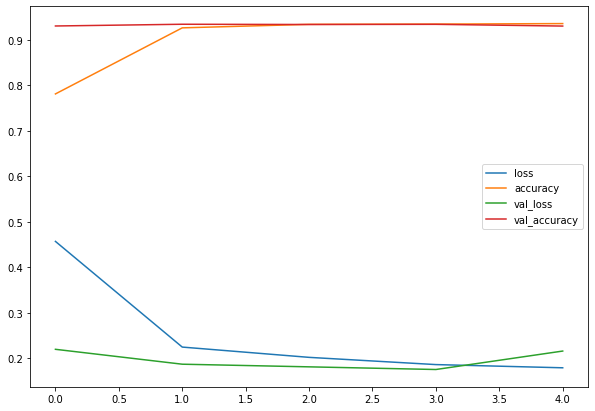

In [14]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [15]:
# from tensorflow.keras.preprocessing import image
# # img = image.load_img(r'/home/harshit/Downloads/cell_images/cell_images/Uninfected/C208ThinF_IMG_20151029_155436_cell_127.png', target_size=(124,img_height))
# #img = image.load_img('/home/harshit/Downloads/cell_images/cell_images/Uninfected/C208ThinF_IMG_20151029_155436_cell_127.png', target_size=(64,64))


# import cv2
# img = cv2.imread('/home/harshit/Downloads/cell_images/cell_images/Uninfected/C208ThinF_IMG_20151029_155436_cell_127.png')
# # img = cv2.imread('/home/harshit/Downloads/cell_images/cell_images/Uninfected/C99P60ThinF_IMG_20150918_142128_cell_45.png')
# img = cv2.resize(img,(64,64))
# img = img.reshape(64,64,3) 


# x = image.img_to_array(img)
# x.shape

In [16]:
# a = model.predict(x)
# print(a)
# if(a == 1):
#     print("uninfected")
# else:
#     print("infected")

In [17]:
# img = cv2.imread('/home/harshit/Downloads/cell_images/cell_images/Parasitized/C182P143NThinF_IMG_20151201_172607_cell_43.png')
# #img = img.reshape(64, 64, 3)
# # img = cv2.resize(img,(64,64,3))
# img = cv2.resize(img,(64,64))
# img = img.reshape(64,64,3)

# x = image.img_to_array(img)

# a = model.predict(x)
# print(a)
# if(a == 0):
#     print("uninfected")
# else:
#     print("infected")

In [18]:
model = load_model('model.h5')

In [27]:
import os
import numpy as np

def predict(img):
    x = image.img_to_array(img)
    x = x/255.0
    x = np.expand_dims(x,axis=0)
    proba = model.predict(x)[0][0]
    print(proba)
    y = "Uninfected" if proba > 0.9 else "Parasitized"
    return y

In [28]:
from tensorflow.keras.preprocessing import image

path = '/home/harshit/Downloads/cell_images/cell_images/Parasitized/C182P143NThinF_IMG_20151201_172607_cell_43.png'

img = image.load_img(path,target_size=(64, 64))

pred = predict(img)
print(pred)

0.03415975
Parasitized


In [29]:
from tensorflow.keras.preprocessing import image

path = '/home/harshit/Downloads/cell_images/cell_images/Uninfected/C99P60ThinF_IMG_20150918_142128_cell_14.png'

img = image.load_img(path,target_size=(64, 64))

pred = predict(img)
print(pred)

0.9110031
Uninfected


In [31]:
img = image.load_img(path, target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
pred = model.predict(x)
print("prediction", pred)
if(pred == 1):
    result = "Uninfected"
else:
    result = "Infected"

print("prediction:", result)

prediction [[1.]]
prediction: Uninfected
